In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Для начала нужно загрузим данные
german_car = pd.read_csv('C:/Users/Dima/Desktop/bd/german_car.csv')

In [4]:
#Внесем коррективы
german_car = german_car.sort_values('manufacture_year')

<Axes: title={'center': 'Зависимость цены авто от года его производства'}, xlabel='manufacture_year'>

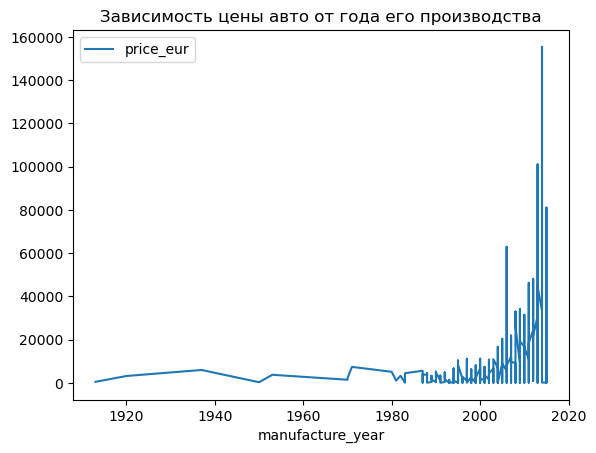

In [5]:
#Построим график зависимости цены авто от года производства
#Для репрезентативности исключим те авто сро
german_car[german_car.manufacture_year>1900].plot.line(title="Зависимость цены авто от года его производства", 
                            x='manufacture_year', y='price_eur')

In [6]:
#Отсортируем по пробегу
german_car = german_car.sort_values('mileage')

<Axes: title={'center': 'Зависимость цены авто от его пробега'}, xlabel='mileage'>

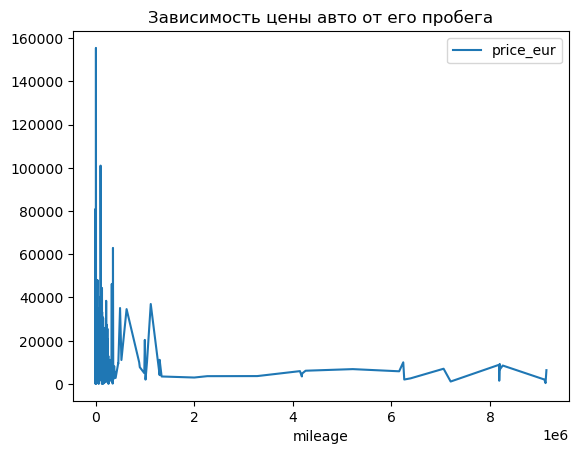

In [7]:
#Построим график зависимости цены авто от пробега
#Для репрезентативности исключим те авто сро
german_car[german_car.manufacture_year>0].plot.line(title="Зависимость цены авто от его пробега", 
                            x='mileage', y='price_eur')

<Axes: >

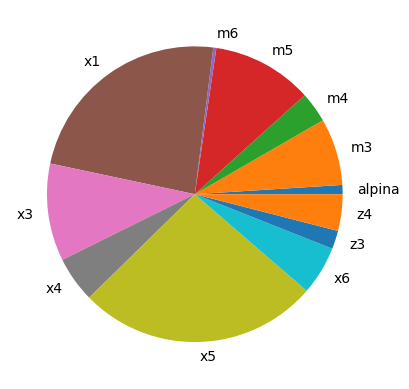

In [8]:
#Теперь на круговой диаграмме рассмотрим для авто марки bmw количество автомболей разных моделей
bmw_cars=german_car[german_car['maker']=="bmw"]
bmw_cars=bmw_cars[['model']]
bmw_cars=bmw_cars.groupby(['model']).size()
bmw_cars.plot.pie()



C:\Users\Dima\AppData\Local\Temp\ipykernel_7732\4032684887.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  car_age=car_age.groupby(['engine_power']).mean().round()


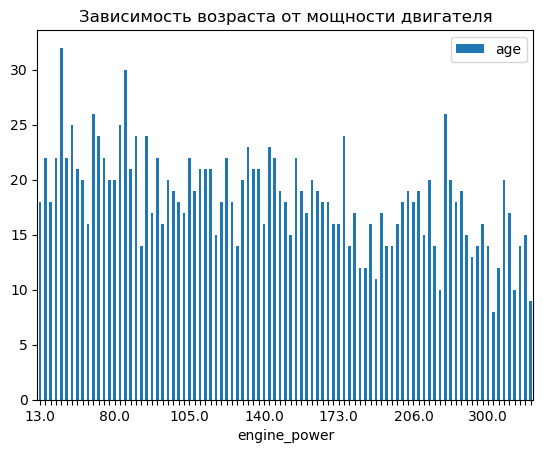

In [10]:
#С помощью диаграмм исследуем зависимость мощности от возраста авто(учитываем авто не старше 30 лет)
def age_transform(x):
    if np.isnan(x['manufacture_year']) or x['manufacture_year']<1990 or np.isnan(x['engine_power']):
        x['manufacture_year']=0
    else:
        x['manufacture_year']=2023-x['manufacture_year']
    return x

#car_age=car_age[(car_age.engine_power>0)]
car_age=german_car.apply(age_transform, axis=1)
car_age.rename(columns = {'manufacture_year':'age'},inplace=True)
car_age=car_age[(car_age.age > 0) ]
car_age=car_age.groupby(['engine_power']).mean().round()

bar_plot=car_age.plot.bar(title="Зависимость возраста от мощности двигателя", y=['age'], rot=0)
for n, label in enumerate(bar_plot.get_xticklabels()):
    if n % 14 != 0:
        label.set_visible(False)

C:\Users\Dima\AppData\Local\Temp\ipykernel_600\948058352.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(german_car.corr());


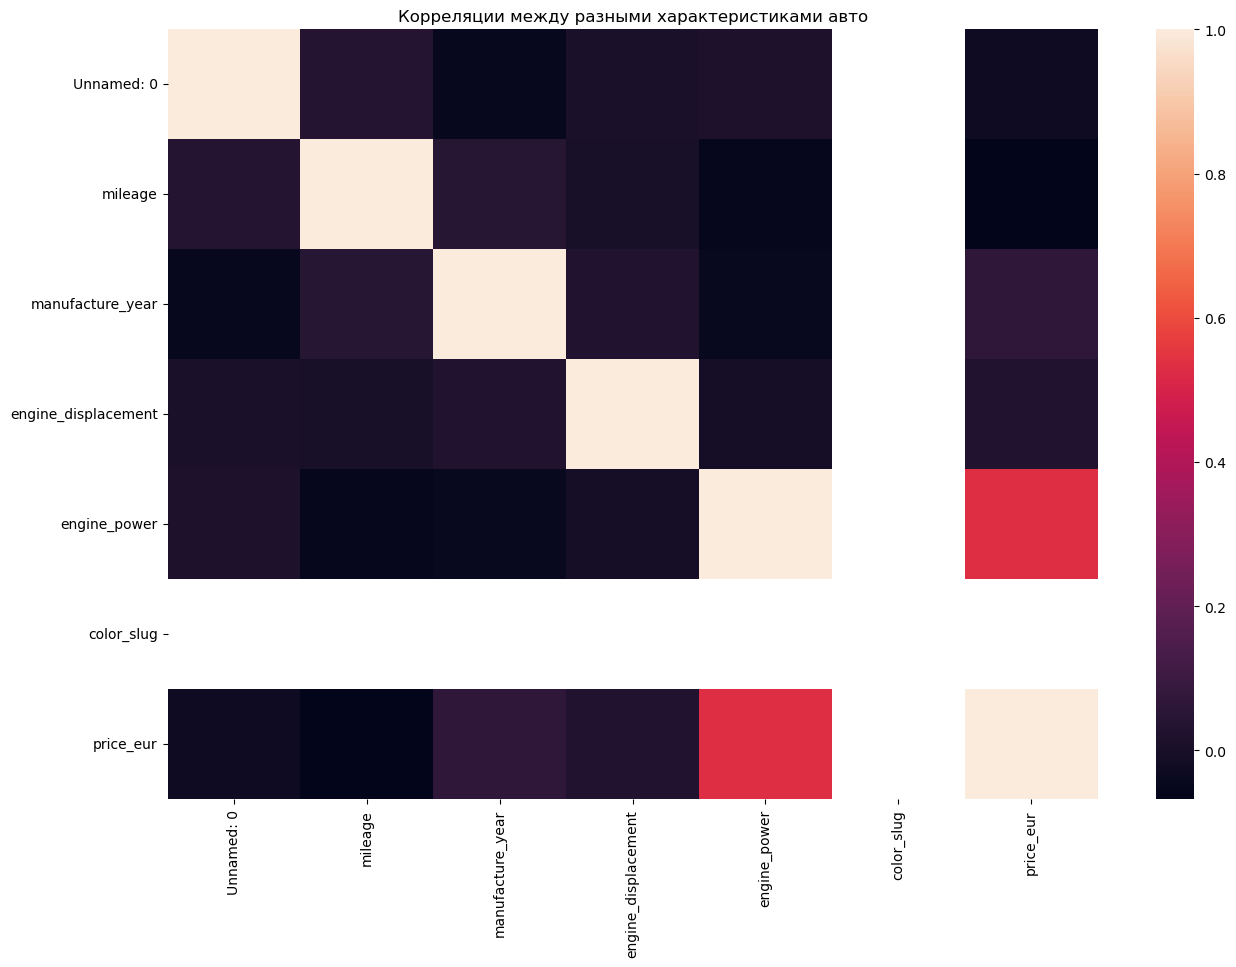

In [101]:
#Изобразим корреляционную матрицу 
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(german_car.corr());
plt.title("Корреляции между разными характеристиками авто");

In [102]:
#Как видно по матрице характеристики слабо связаны
#Попробуем улучшить поправить данные
#Для начала удалим столбцы с большим числом пустых клеток

In [118]:
proc_car=german_car.drop(columns=['Unnamed: 0', 'color_slug'])

C:\Users\Dima\AppData\Local\Temp\ipykernel_600\2651138077.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(proc_car.corr());


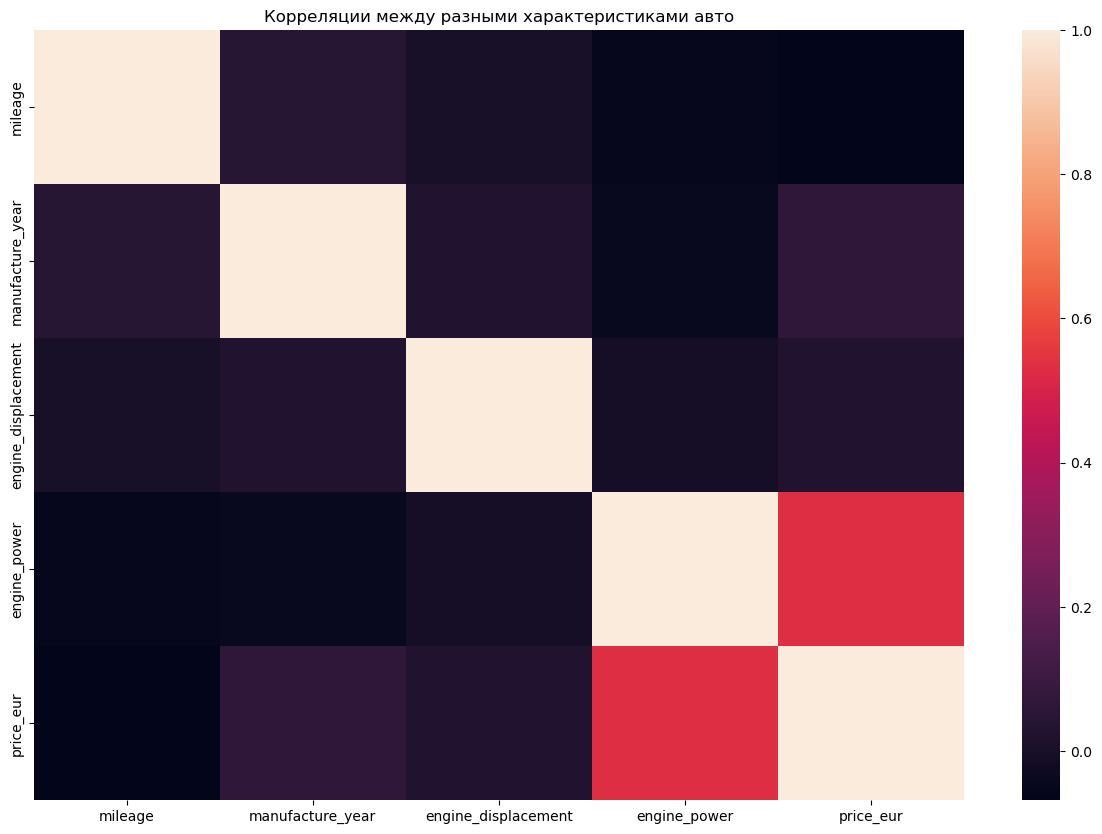

In [119]:
plt.figure(figsize=(15,10))
sns.heatmap(proc_car.corr());
plt.title("Корреляции между разными характеристиками авто");

In [120]:
#Далее попробуем сократить число строк содержащих пустые клетки
proc_car.count()

maker                  2958
model                  1226
mileage                 806
manufacture_year       1543
engine_displacement     996
engine_power           1043
body_type              2958
stk_year               2958
transmission            861
door_count             2958
seat_count             2958
fuel_type              2958
date_created           2958
date_last_seen         2958
price_eur              2958
dtype: int64

C:\Users\Dima\AppData\Local\Temp\ipykernel_600\2474832827.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(proc_car.corr());


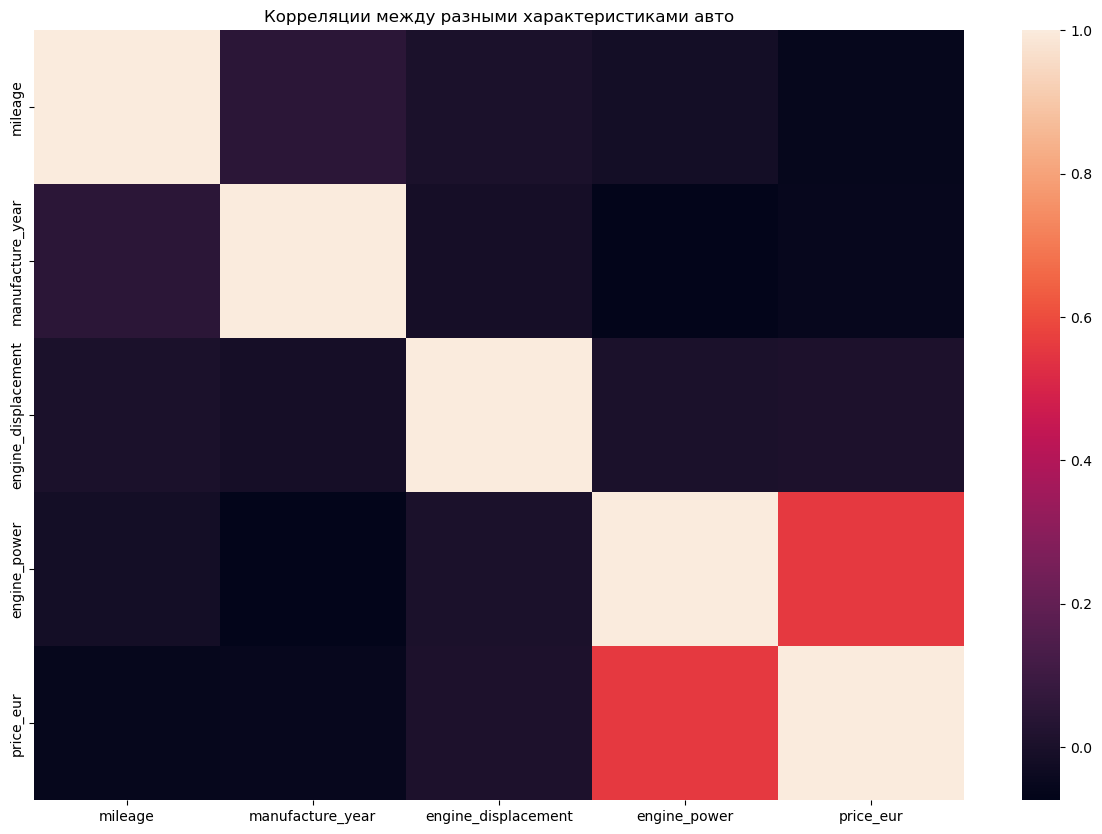

In [133]:
proc_car=proc_car[~np.isnan(proc_car['engine_displacement'])]
plt.figure(figsize=(15,10))
sns.heatmap(proc_car.corr());
plt.title("Корреляции между разными характеристиками авто");

In [134]:
proc_car

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
764,audi,NaN,2.0,2005.0,4200.0,246.0,compact,None,auto,None,None,gasoline,2015-11-14 20:32:36.333494+00,2016-01-27 20:40:15.46361+00,11472.98
2604,audi,80,8.0,NaN,2000.0,85.0,compact,None,NaN,None,None,gasoline,2015-11-14 20:49:58.047013+00,2016-01-27 20:40:15.46361+00,222.06
833,bmw,NaN,20.0,1229.0,700.0,281.0,compact,None,NaN,None,None,gasoline,2015-11-14 20:33:12.998703+00,2016-01-27 20:40:15.46361+00,11.10
239,bmw,NaN,100.0,NaN,6100.0,NaN,compact,None,NaN,None,None,gasoline,2015-11-14 20:27:38.132142+00,2016-01-27 20:40:15.46361+00,2035.53
1387,bmw,NaN,100.0,1989.0,8500.0,85.0,compact,None,NaN,None,None,diesel,2015-11-14 20:38:22.714639+00,2016-01-27 20:40:15.46361+00,2005.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,bmw,NaN,8182000.0,2008.0,8182.0,NaN,compact,None,man,None,None,gasoline,2015-11-14 20:44:30.731125+00,2016-01-27 20:40:15.46361+00,8845.30
517,audi,200,8186000.0,2008.0,1900.0,NaN,compact,None,NaN,None,None,gasoline,2015-11-14 20:30:06.250541+00,2016-01-27 20:40:15.46361+00,1480.38
2412,audi,a3,8197000.0,2008.0,1900.0,77.0,compact,None,auto,None,None,gasoline,2015-11-14 20:48:03.604381+00,2016-01-27 20:40:15.46361+00,9215.40
1272,mercedes-benz,NaN,8257000.0,2008.0,8257.0,125.0,compact,None,NaN,None,None,gasoline,2015-11-14 20:37:28.304749+00,2016-01-27 20:40:15.46361+00,8512.18
